In [1]:
# 2. Ï†ïÍ∑úÌëúÌòÑÏãùÏúºÎ°ú Ìï¥ÏãúÌÉúÍ∑∏Î•º Ï†úÍ±∞Ìï¥ÏÑú Ï†ÑÏ≤òÎ¶¨ ÌïòÎäî Í≤É Î≥¥Îã® Ìï¥ÏãúÌÉúÍ∑∏Î•º Ïù¥Ïö©Ìïú Î∂ÑÏÑùÏùÑ ÌïòÎäî Í≤ÉÎèÑ Ï¢ãÎã§Í≥† ÏÉùÍ∞ÅÌï®

In [2]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from tqdm import tqdm
from collections import Counter
import swifter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [3]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Í∑∏Î¶º Ï†ÄÏû•:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"Ìï¥Îãπ pcÏùò Ïö¥ÏòÅ Ï≤¥Ï†úÎäî {platform.system()}Ïù¥Î©∞ {font_name}Î°ú ÏÑ§Ï†ïÎêòÏóàÏäµÎãàÎã§")  
    return path

In [5]:
path = Fontmanager()

Ìï¥Îãπ pcÏùò Ïö¥ÏòÅ Ï≤¥Ï†úÎäî DarwinÏù¥Î©∞ Arial Unicode MSÎ°ú ÏÑ§Ï†ïÎêòÏóàÏäµÎãàÎã§


In [6]:
election = pd.read_csv('dataset/election.csv')
election = election.drop_duplicates()

In [7]:
women_policy = pd.read_csv('dataset/women_policy.csv')
# ÌòπÏãú Î™®Î•º Ï§ëÎ≥µÏ†úÍ±∞
women_policy = women_policy.drop_duplicates()

In [8]:
# ÌòπÏãú Î™®Î•º nanÍ∞í ÌôïÏù∏
women_policy.isna().sum()

datetime    0
id          0
text        0
username    0
dtype: int64

In [9]:
# Ï†ïÍ∑úÌëúÌòÑÏãù Ïù¥Ïö©Ìïú Ï†ÑÏ≤òÎ¶¨
def clean(text):
    #\n Í≥µÎ∞± Ï†úÍ±∞
    text = re.sub('\n',' ',str(text))
    # URL Ï†úÍ±∞
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # ÌïúÍ∏ÄÏûê Ï†úÍ±∞ (ex:„Öã„Öã, „Öú„Öú)
    text = re.sub('([„Ñ±-„Öé„Öè-„Ö£])+', '', str(text))
    # @ÏïåÌååÎ≤≥ Ï†úÍ±∞ 
    return str(text)

In [10]:
women_policy['text'] = women_policy['text'].apply(lambda x : clean(x))

In [11]:
# Ïñ¥Îñ§ Ïú†Ï†ÄÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ Ìä∏ÏúóÏùÑ ÏçªÎäîÏßÄ
plt.figure(figsize=(20,10))
sns.barplot(x=women_policy['username'].value_counts()[:20].values, 
            y=women_policy['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(women_policy['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
# save_fig('Top 20 who the most writes')

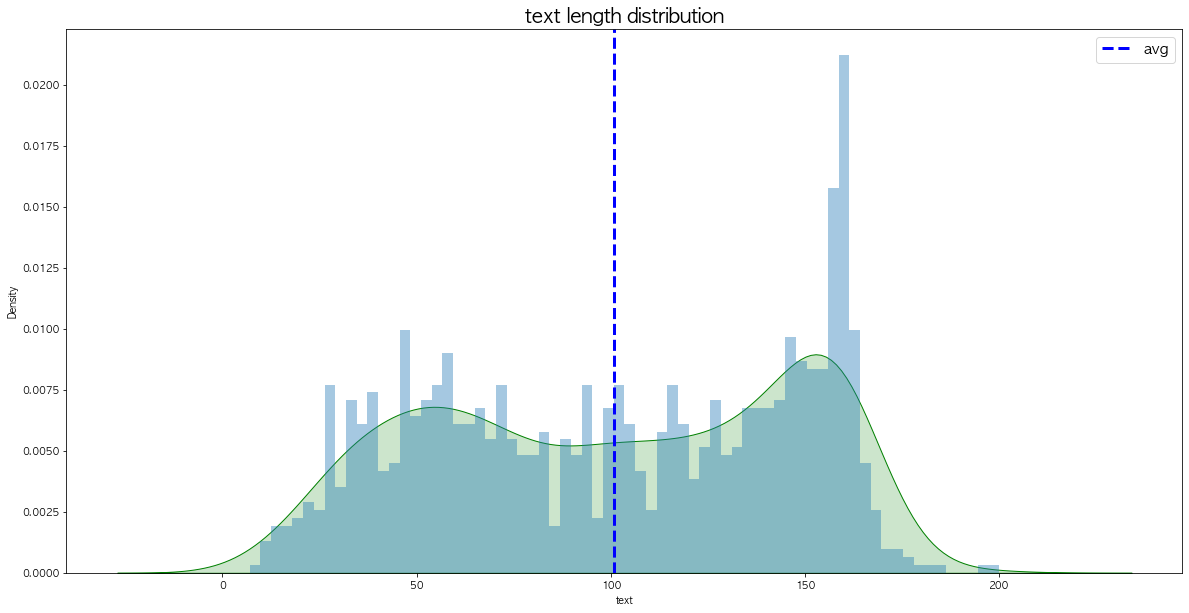

In [12]:
# Ï†ÑÏ≤¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
plt.figure(figsize=(20,10))
sns.distplot(a=women_policy['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(women_policy['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
# save_fig('text length distribution')

In [13]:
# tokenizer
kkma = Kkma()
komoran = Komoran()
okt = Okt()
mecab = Mecab()

# stopwords list
stop_words = pd.read_csv('dataset/ÌïúÍµ≠Ïñ¥Î∂àÏö©Ïñ¥100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

In [14]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

In [15]:
def tokenizing(df, tokenizer):
    nouns = df.swifter.apply(lambda x : tokenizer.nouns(x))
    nouns_list = np.concatenate(nouns.tolist()).tolist()
    words = [n for n in nouns_list if len(n) > 1] 
    return nouns_list, words

In [16]:
def stopwords(words, stop_words):
    words_new = []

    for word in words:
        if word not in stop_words:
            words_new.append(word)
    return words_new

In [17]:
def wordcloud(c):
    wc = WordCloud(font_path='Arial Unicode', width=2000, height=1200, background_color ='white', scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize = (12, 6), facecolor = None) 
    plt.imshow(gen)
    plt.axis("off")
    plt.tight_layout(pad=0)
    # save_fig("most_common_words_wordcloud")

In [18]:
# wordcloud
nouns_list, words = tokenizing(women_policy['text'], okt)
words_new = stopwords(words, stop_words)
c, cw = common_words(words_new, 200)
wordcloud(c)

Pandas Apply:   0%|          | 0/1128 [00:00<?, ?it/s]

In [19]:
# Îã®Ïñ¥ Í∏∏Ïù¥ Î∂ÑÌè¨
nouns = women_policy['text'].swifter.apply(lambda x : okt.nouns(x))

Pandas Apply:   0%|          | 0/1128 [00:00<?, ?it/s]

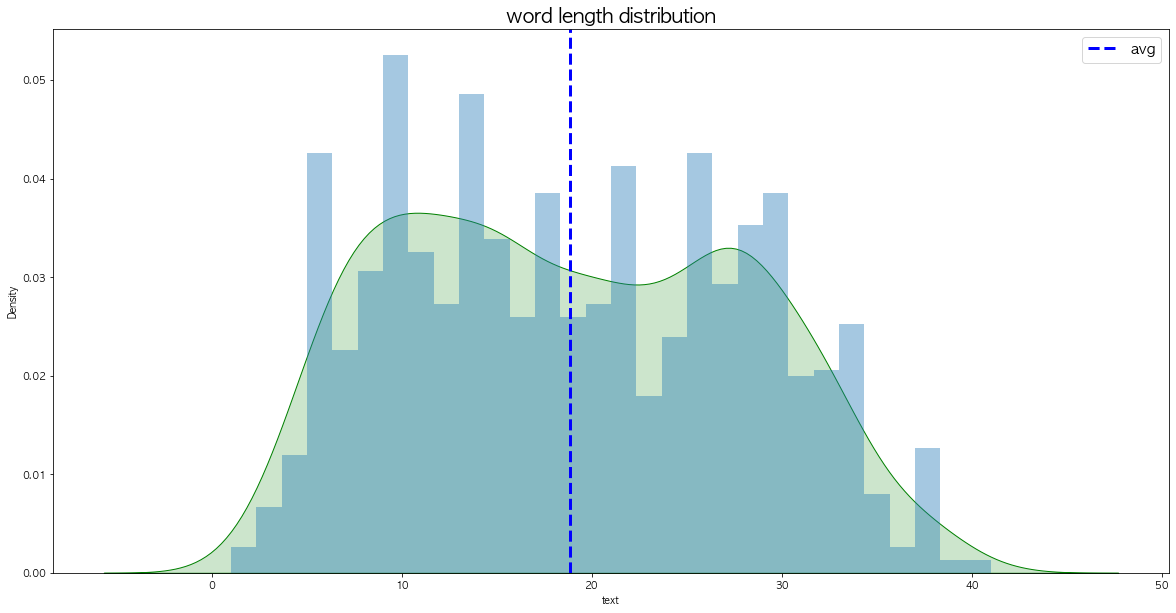

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(a=nouns.str.len(), bins=30, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('word length distribution', fontsize=20)
plt.axvline(x=nouns.str.len().mean(), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)

In [21]:
# stopword Îã®Ïñ¥ Î∂ÑÌè¨

def stopwords(words, stop_words):
    words_new = []

    for word in words:
        if word in stop_words:
            words_new.append(word)
    return words_new

In [ ]:
# Î∂àÏö©Ïñ¥ ÏÇ¨Ï†ÑÏóê 'Ïó¨Ïûê' Îì±Ïùò Îã®Ïñ¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Î∫êÏùå

In [22]:
words_new = stopwords(words, stop_words)

No handles with labels found to put in legend.


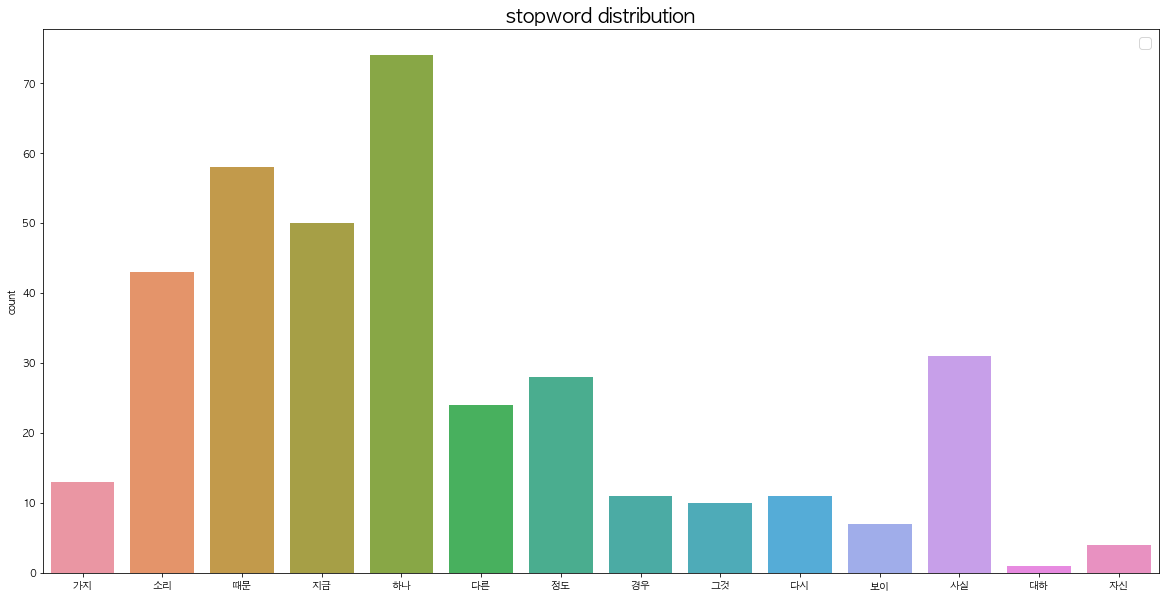

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(words_new)
plt.title('stopword distribution', fontsize=20)
plt.legend(fontsize=15)

In [28]:
# ngram exploration
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [33]:
new = women_policy['text'].str.split()
new = new.values.tolist()

In [38]:
new

[['ÎåÄÌÜµÎ†πÏùÑ',
  'Î≥∏',
  'Ïù¥Îûò',
  'Í∞ÄÏû•',
  'Í∞ïÌïú',
  'Î∞úÏñ∏Ïù¥',
  'ÎÇòÏôîÏùå',
  'Í∞ÅÌïò',
  'Ï∂©ÏÑ±Ï∂©ÏÑ±Ï∂©ÏÑ±',
  'ÎØºÏ£ºÎãπÏùò',
  'Ïó¨ÏÑ±Ï†ïÏ±Ö',
  'ÎÖ∏ÎèôÏ†ïÏ±Ö',
  'ÌôòÍ≤ΩÏ†ïÏ±Ö',
  'Ïó¥Ïã¨Ìûà',
  'ÌôçÎ≥¥ÌïòÍ≥†',
  'Îòê',
  'ÏòÅÏóÖÌïòÍ≤†Ïä¥Îã§',
  'Î¨∏Ïû¨Ïù∏',
  'ÎÑàÎ¨¥ÎÑàÎ¨¥',
  'ÏÇ¨ÎûëÌïòÍ≥†',
  'Ï°¥Í≤ΩÌï©ÎãàÎã§'],
 ['Î¨∏ÎåÄÌÜµÎ†πÏùÄ',
  'ÏßÄÏßÄÌïòÍ≥†',
  'Ïù¥Ïû¨Î™ÖÏùÄ',
  'Ï°¥ÎÇò',
  'Ïã´Ïñ¥ÏÑú',
  'ÎΩëÏùÑ',
  'ÏÇ¨Îûå',
  'ÏóÜÏñ¥Í∞ÄÏßÄÍ≥†',
  'Í¥¥Î°≠ÎÑ§',
  'Ïñ¥Ï©åÎÑ§',
  'ÌïòÎäî',
  'Í±∞',
  'ÏßÑÏßú',
  'ÏõÉÍπÄ',
  'Ïó¨ÏÑ±Ï†ïÏ±Ö',
  'Í∞ÄÏßÄÍ≥†',
  'ÏûêÎπ†ÏßÑ',
  'Í±∞Î©¥',
  'Ï†úÎåÄÎ°ú',
  'ÏùΩÍ≥†',
  'ÏôîÏúºÎ©¥',
  'Ï¢ãÍ≤†Ïùå',
  'Í∑ºÎç∞',
  'ÏßÄÎÇú',
  'ÎåÄÏÑ†',
  'Í¥ÄÎ†®ÏúºÎ°ú',
  'Ïù¥Ïû¨Î™ÖÏù¥',
  'Ïã´Ïñ¥ÏÑú',
  'Î™ª',
  'ÎΩëÍ≤†Îã§Í≥†',
  'ÌïòÎäî',
  'ÏÇ¨ÎûåÎì§ÏùÄ',
  'ÎÑàÎ¨¥',
  'ÌòºÏûêÏÑú',
  'Í≥ºÎ™∞ÏûÖÌïòÎ©¥ÏÑú',
  'ÏÇ¨ÎäîÍ±∞',
  'ÏïÑÎãåÍ∞Ä?'],
 ['Ïñ∏Ï†úÎäî',
  'ÌîºÌï¥Ïûê',
  'Ïñ∏Í∏âÍ≥º',
  'ÏÇ¨Í≥ºÎ•º',
  'Ïïà',
  'ÌñàÏúºÎãà',
  'ÎØºÏ£ºÎãπÏóê',
  'ÎèåÏïÑÏ

In [35]:
corpus = sum(new, [])

In [36]:
corpus

['ÎåÄÌÜµÎ†πÏùÑ',
 'Î≥∏',
 'Ïù¥Îûò',
 'Í∞ÄÏû•',
 'Í∞ïÌïú',
 'Î∞úÏñ∏Ïù¥',
 'ÎÇòÏôîÏùå',
 'Í∞ÅÌïò',
 'Ï∂©ÏÑ±Ï∂©ÏÑ±Ï∂©ÏÑ±',
 'ÎØºÏ£ºÎãπÏùò',
 'Ïó¨ÏÑ±Ï†ïÏ±Ö',
 'ÎÖ∏ÎèôÏ†ïÏ±Ö',
 'ÌôòÍ≤ΩÏ†ïÏ±Ö',
 'Ïó¥Ïã¨Ìûà',
 'ÌôçÎ≥¥ÌïòÍ≥†',
 'Îòê',
 'ÏòÅÏóÖÌïòÍ≤†Ïä¥Îã§',
 'Î¨∏Ïû¨Ïù∏',
 'ÎÑàÎ¨¥ÎÑàÎ¨¥',
 'ÏÇ¨ÎûëÌïòÍ≥†',
 'Ï°¥Í≤ΩÌï©ÎãàÎã§',
 'Î¨∏ÎåÄÌÜµÎ†πÏùÄ',
 'ÏßÄÏßÄÌïòÍ≥†',
 'Ïù¥Ïû¨Î™ÖÏùÄ',
 'Ï°¥ÎÇò',
 'Ïã´Ïñ¥ÏÑú',
 'ÎΩëÏùÑ',
 'ÏÇ¨Îûå',
 'ÏóÜÏñ¥Í∞ÄÏßÄÍ≥†',
 'Í¥¥Î°≠ÎÑ§',
 'Ïñ¥Ï©åÎÑ§',
 'ÌïòÎäî',
 'Í±∞',
 'ÏßÑÏßú',
 'ÏõÉÍπÄ',
 'Ïó¨ÏÑ±Ï†ïÏ±Ö',
 'Í∞ÄÏßÄÍ≥†',
 'ÏûêÎπ†ÏßÑ',
 'Í±∞Î©¥',
 'Ï†úÎåÄÎ°ú',
 'ÏùΩÍ≥†',
 'ÏôîÏúºÎ©¥',
 'Ï¢ãÍ≤†Ïùå',
 'Í∑ºÎç∞',
 'ÏßÄÎÇú',
 'ÎåÄÏÑ†',
 'Í¥ÄÎ†®ÏúºÎ°ú',
 'Ïù¥Ïû¨Î™ÖÏù¥',
 'Ïã´Ïñ¥ÏÑú',
 'Î™ª',
 'ÎΩëÍ≤†Îã§Í≥†',
 'ÌïòÎäî',
 'ÏÇ¨ÎûåÎì§ÏùÄ',
 'ÎÑàÎ¨¥',
 'ÌòºÏûêÏÑú',
 'Í≥ºÎ™∞ÏûÖÌïòÎ©¥ÏÑú',
 'ÏÇ¨ÎäîÍ±∞',
 'ÏïÑÎãåÍ∞Ä?',
 'Ïñ∏Ï†úÎäî',
 'ÌîºÌï¥Ïûê',
 'Ïñ∏Í∏âÍ≥º',
 'ÏÇ¨Í≥ºÎ•º',
 'Ïïà',
 'ÌñàÏúºÎãà',
 'ÎØºÏ£ºÎãπÏóê',
 'ÎèåÏïÑÏÑúÍ≤†Îã§',
 'ÌïòÎçîÎãà,',
 'Ïù¥Ï†úÎäî',
 'ÏÇ¥Ïù∏ÏûêÍ∞Ä',
 'ÎÇ¥ÏÑ∏Ïö∞

In [34]:
new

[['ÎåÄÌÜµÎ†πÏùÑ',
  'Î≥∏',
  'Ïù¥Îûò',
  'Í∞ÄÏû•',
  'Í∞ïÌïú',
  'Î∞úÏñ∏Ïù¥',
  'ÎÇòÏôîÏùå',
  'Í∞ÅÌïò',
  'Ï∂©ÏÑ±Ï∂©ÏÑ±Ï∂©ÏÑ±',
  'ÎØºÏ£ºÎãπÏùò',
  'Ïó¨ÏÑ±Ï†ïÏ±Ö',
  'ÎÖ∏ÎèôÏ†ïÏ±Ö',
  'ÌôòÍ≤ΩÏ†ïÏ±Ö',
  'Ïó¥Ïã¨Ìûà',
  'ÌôçÎ≥¥ÌïòÍ≥†',
  'Îòê',
  'ÏòÅÏóÖÌïòÍ≤†Ïä¥Îã§',
  'Î¨∏Ïû¨Ïù∏',
  'ÎÑàÎ¨¥ÎÑàÎ¨¥',
  'ÏÇ¨ÎûëÌïòÍ≥†',
  'Ï°¥Í≤ΩÌï©ÎãàÎã§'],
 ['Î¨∏ÎåÄÌÜµÎ†πÏùÄ',
  'ÏßÄÏßÄÌïòÍ≥†',
  'Ïù¥Ïû¨Î™ÖÏùÄ',
  'Ï°¥ÎÇò',
  'Ïã´Ïñ¥ÏÑú',
  'ÎΩëÏùÑ',
  'ÏÇ¨Îûå',
  'ÏóÜÏñ¥Í∞ÄÏßÄÍ≥†',
  'Í¥¥Î°≠ÎÑ§',
  'Ïñ¥Ï©åÎÑ§',
  'ÌïòÎäî',
  'Í±∞',
  'ÏßÑÏßú',
  'ÏõÉÍπÄ',
  'Ïó¨ÏÑ±Ï†ïÏ±Ö',
  'Í∞ÄÏßÄÍ≥†',
  'ÏûêÎπ†ÏßÑ',
  'Í±∞Î©¥',
  'Ï†úÎåÄÎ°ú',
  'ÏùΩÍ≥†',
  'ÏôîÏúºÎ©¥',
  'Ï¢ãÍ≤†Ïùå',
  'Í∑ºÎç∞',
  'ÏßÄÎÇú',
  'ÎåÄÏÑ†',
  'Í¥ÄÎ†®ÏúºÎ°ú',
  'Ïù¥Ïû¨Î™ÖÏù¥',
  'Ïã´Ïñ¥ÏÑú',
  'Î™ª',
  'ÎΩëÍ≤†Îã§Í≥†',
  'ÌïòÎäî',
  'ÏÇ¨ÎûåÎì§ÏùÄ',
  'ÎÑàÎ¨¥',
  'ÌòºÏûêÏÑú',
  'Í≥ºÎ™∞ÏûÖÌïòÎ©¥ÏÑú',
  'ÏÇ¨ÎäîÍ±∞',
  'ÏïÑÎãåÍ∞Ä?'],
 ['Ïñ∏Ï†úÎäî',
  'ÌîºÌï¥Ïûê',
  'Ïñ∏Í∏âÍ≥º',
  'ÏÇ¨Í≥ºÎ•º',
  'Ïïà',
  'ÌñàÏúºÎãà',
  'ÎØºÏ£ºÎãπÏóê',
  'ÎèåÏïÑÏ

In [40]:
new = sum(new, [])

In [ ]:
stop_words

In [ ]:
nouns.str.len().hist()

In [ ]:
nouns.str.len().mean()

In [ ]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()

In [ ]:
mecab.nouns(women_policy['text'][0])

In [ ]:
nouns = women_policy['text'].swifter.apply(lambda x : mecab.nouns(x))

In [ ]:
words_new = stopwords(words, stop_words)

In [ ]:
c, cw = common_words(words_new, 200)

In [ ]:
wordcloud(c)

In [ ]:
np.concatenate(women_policy['text'].tolist()).tolist()

In [ ]:
women_policy['text'].tolist()

In [ ]:
women_policy['text'].swifter.apply(lambda x : komoran.nouns(x))

In [ ]:
len(women_policy['text'])

In [ ]:
word_list = []
for i in range(len(women_policy['text'])):
    word = mecab.nouns(women_policy['text'][i])
    word_list.append(word)

In [ ]:
word_list = []
for i in range(15):
    word = komoran.nouns(women_policy['text'][i])
    word_list.append(word)

In [ ]:
new_word_list = np.concatenate(word_list).tolist()

In [ ]:
words = [n for n in new_word_list if len(n) > 1] 

In [ ]:
words

In [ ]:
words_new = stopwords(words, stop_words)

In [ ]:
words_new

In [ ]:
c, cw = common_words(words_new, 200)

In [ ]:
= np.concatenate(word_list).tolist()

In [ ]:
len(women_policy['text'])

In [ ]:
word = komoran.nouns(women_policy['text'][0])
word

In [ ]:
women_policy['text'][0]

In [ ]:
komoran.pos(women_policy['text'].tolist())